In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
plt.rcParams['figure.figsize']= (15,5)

In [4]:
path = "../dataset/"
filename = "data_1_mes_final.csv"
file = path + str(filename)
df_mes = pd.read_csv(file, delimiter=';')

In [31]:
# Plotando 

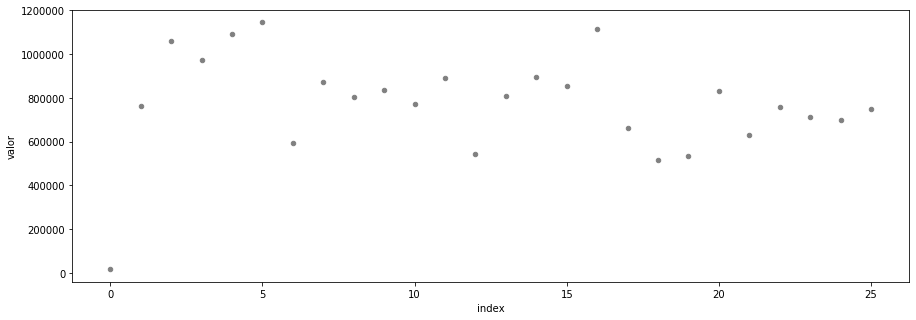

In [32]:
df_mes.plot(kind='scatter', x='index', y='valor', color='gray')

In [9]:
df_mes.tail()

,index,mes,ano,valor
22,22,6,2018,759047.88
23,23,7,2018,711501.72
24,24,8,2018,700150.67
25,25,9,2018,747653.22
26,26,10,2018,635530.09


In [10]:
# Dropando ultima linha do df

In [11]:
proxima_fatura_mes = df_mes['valor'].values[-1]
df_mes = df_mes.drop(df_mes.index[-1])

target_df_mes = [[proxima_fatura_mes]]

In [34]:
target_df_mes

[[635530.09]]

In [12]:
df_mes.tail()

,index,mes,ano,valor
21,21,5,2018,628620.80
22,22,6,2018,759047.88
23,23,7,2018,711501.72
24,24,8,2018,700150.67
25,25,9,2018,747653.22


In [16]:
# Test

In [17]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn import metrics
import numpy as np

In [30]:
model = Pipeline([('poly', PolynomialFeatures(degree=4)),
                 ('linear', LinearRegression(fit_intercept=False))])

In [19]:
X = pd.DataFrame(df_mes['index'])
y = pd.DataFrame(df_mes['valor'])

In [20]:
model.fit(X,y)

Pipeline(memory=None,
         steps=[('poly',
                 PolynomialFeatures(degree=4, include_bias=True,
                                    interaction_only=False, order='C')),
                ('linear',
                 LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [21]:
pred_df_mes = (model.predict([[26]]))

In [22]:
pred_df_mes

array([[541643.47279594]])

In [23]:
y_test = pred_df_mes
y_pred = target_df_mes
print('MAE: ', metrics.mean_absolute_error(y_test, y_pred))
print('MSE', metrics.mean_squared_error(y_test, y_pred))
print('RMSE', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE:  93886.61720406276
MSE 8814696890.022213
RMSE 93886.61720406276


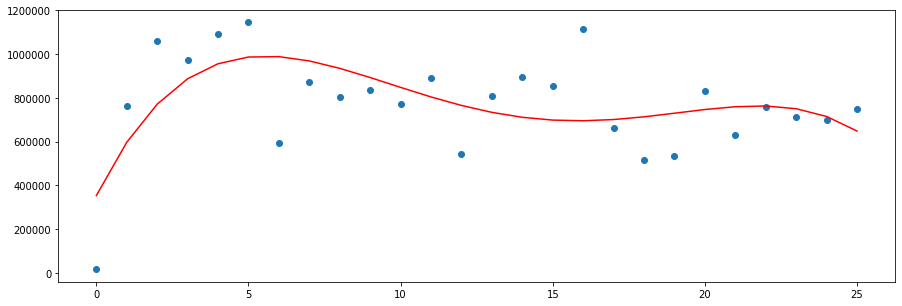

In [24]:
Y_pred = model.predict(X)
plt.scatter(X,y)
plt.plot(X, Y_pred, color='red')
plt.show()

In [25]:
df_mes.corr()

,index,mes,ano,valor
index,1.000000,-0.130416,0.922017,-0.116555
mes,-0.130416,1.000000,-0.504089,0.283360
ano,0.922017,-0.504089,1.000000,-0.212178
valor,-0.116555,0.283360,-0.212178,1.000000


In [26]:
# correlação fraca entre index e valor. 0.117

In [27]:
import seaborn as sns

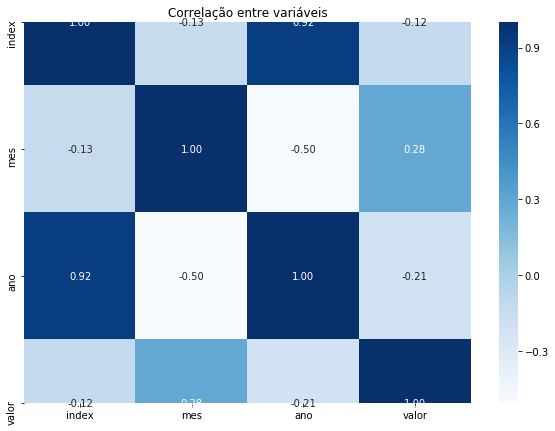

In [28]:
plt.figure(figsize=(10, 7))
sns.heatmap(df_mes.corr(),
            annot = True,
            fmt = '.2f',
            cmap='Blues')
plt.title('Correlação entre variáveis')
plt.show()